# TRAJECTOIRE PARABOLIQUE ET PFD

L’étude du mouvement d’une balle de golf à partir d’une chronophotographie permet de tracer les variations du vecteur vitesse au cours du temps.  Cette construction permet d’estimer la valeur de g.

**Capacité numérique mise en œuvre** : Utiliser un langage de programmation pour étudier la relation approchée entre la variation du vecteur vitesse d’un système modélisé par un point matériel entre deux instants voisins et la somme des forces appliquées sur celui-ci.

Les mesures pointées sont :

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x=np.array([0.01,0.41,0.91,1.39,1.86,2.33,2.81,3.33,3.79,4.31,4.83,5.36,5.86,6.34,6.77])
y=np.array([0.01,0.52,1.01,1.42,1.77,2.02,2.16,2.19,2.13,1.96,1.71,1.38,0.97,0.50,0])
t=0.1*np.arange(len(x))

## 1. Construction de la liste des vecteurs vitesse
Le script utilise deux listes : l’une contenant les valeurs successives de la vitesse horizontale, l’autre, celles de la vitesse verticale. Ces valeurs sont calculées une à une au moyen d’une boucle `for` puis ajoutées aux listes grâce à la fonction `append`. Le script débute l’initialisation de la liste : la ligne vxl=[] qui crée une liste vide. Puis pour chaque élément d’une liste redimensionnée (il est impossible de calculer x[i+2]), la vitesse horizontale vx est calculée, puis ajoutée à la liste vxl, grâce à `vxl.append(vx)`. 

In [3]:
vxl=[]
m=np.arange(len(t)-2)
for i in m :
    vx=(x[i+2]-x[i])/(t[i+2]-t[i])
    vxl.append(vx)

vyl=[]
m=np.arange(len(t)-2)
for i in m :
    vy=(y[i+2]-y[i])/(t[i+2]-t[i])
    vyl.append(vy)

## 2. Construction de la liste des vecteurs variation de vitesse par unité de temps
Avec exactement la même démarche, il est possible de faire calculer les variations des vitesses horizontale et verticale par unité de temps. Il faut simplement, là encore, prendre garde à redimensionner les listes.

In [4]:
axl=[]
m=np.arange(len(t)-4)
for i in m :
    ax=(vxl[i+2]-vxl[i])/(t[i+2]-t[i])
    axl.append(ax)

ayl=[]
m=np.arange(len(t)-4)
for i in m :
    ay=(vyl[i+2]-vyl[i])/(t[i+2]-t[i])
    ayl.append(ay)

## 3. Représentation des vecteurs variation de vitesse
Il est alors possible de tracer les vecteurs variation de vitesse par unité de temps pour les diverses positions, en prenant garde à l’affectation des points. En effet, la construction de la liste des valeurs de vitesse décale, comme celle de l’accélération, de 1, la ième valeur de la liste axl, axl[i], correspond en fait à l’accélération horizontale pour le point i+2. Il faut aussi prendre garde à l’échelle des vecteurs (c’est le facteur 0.1). On superpose un ensemble de vecteurs verticaux dont la norme est celle d’un champ de pesanteur de 9.8 m.s-2 (en prenant garde à l’échelle de représentation (facteur 0,1)). Les arguments `fc` et `ec` codent les couleurs des flèches et de la tête des flèches. 

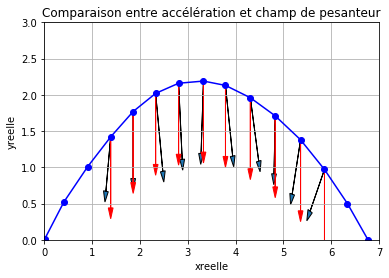

In [5]:
m=np.arange(1,len(t)-4)
for i in m :
    plt.arrow(x[i+2],y[i+2],0.1*axl[i],0.1*ayl[i],head_width=0.1)
    plt.arrow(x[i+2],y[i+2],0*axl[i],0.1*(0*axl[i]-9.8),fc='r',ec='r',head_width=0.1)
plt.xlim(0,7)
plt.ylim(0,3)
plt.grid()
plt.plot(x,y,'bo-')
plt.xlabel("xreelle")
plt.ylabel("yreelle")
plt.title("Comparaison entre accélération et champ de pesanteur")
plt.show()

**Analyse** : On illustre le fait que les variations du vecteur vitesse sont pratiquement verticales, dans le sens descendant. 

## 4. Comparaison des valeurs
Pour préciser la comparaison, les valeurs successives de l’accélération verticale sont extraites puis tracées en fonction de la position. Sur ce même graphe, sont ajoutées :
* une droite horizontale d’ordonnée constante égale à - 9,8 m.s-2 
* une droite horizontale dont l’ordonnée correspond à la  moyenne des valeurs de l’accélération verticale de la balle de golf.

Il est alors possible d’évaluer, de manière plus quantitative, la pertinence d’une modélisation fondée sur l’utilisation du PFD et considérant l’action unique du poids dans un champ de pesanteur supposé uniforme. 


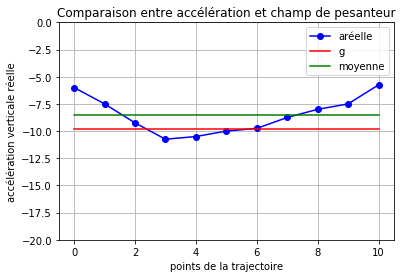

-8.5


In [6]:
m=np.arange(0,len(t)-4)
ath=0*m-9.8
mod=np.polyfit(m,ayl,0)
moda=0*m+mod[0]
plt.plot(m,ayl,'bo-',label="aréelle")
plt.legend()
plt.grid()
plt.ylim(-20,0)
plt.plot(m,ath,'r-',label="g")
plt.legend()
plt.plot(m,moda,'g-',label="moyenne")
plt.legend()
plt.xlabel("points de la trajectoire")
plt.ylabel("accélération verticale réelle")
plt.title("Comparaison entre accélération et champ de pesanteur")
plt.show()
print(round(mod[0],1))

**Conclusion** : L’accélération verticale reste proche de la valeur du champ de pesanteur. Le fait que la comparaison n’est pas très convaincante est certainement dû aux erreurs de pointé. 